In [1]:
from dowhy import CausalModel
import dowhy.datasets

# Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)

In [2]:
# I. Create a causal model from the data and given graph.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])

# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# III. Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

# IV. Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


/Users/mattiasappelgren/miniconda3/envs/probrobnlp/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/mattiasappelgren/miniconda3/envs/probrobnlp/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<AxesSubplot:xlabel='v0'>

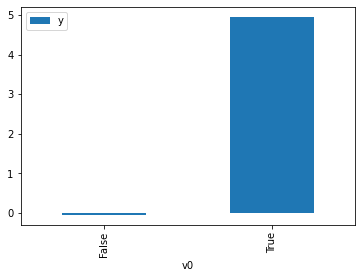

In [3]:
import dowhy.api
import dowhy.datasets

data = dowhy.datasets.linear_dataset(beta=5,
    num_common_causes=1,
    num_instruments = 0,
    num_samples=1000,
    treatment_is_binary=True)

# data['df'] is just a regular pandas.DataFrame
data['df'].causal.do(x='v0', # name of treatment variable
                     variable_types={'v0': 'b', 'y': 'c', 'W0': 'c'},
                     outcome='y',
                     common_causes=['W0']).groupby('v0').mean().plot(y='y', kind='bar')
